### Задача 4.1 Расчет ширины линии излучения полупроводникового лазера

По доброй традиции

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Параметры

In [2]:
h=6.63*10**(-34) # постоянная Планка в Дж с
l=1310*10**(-9) # длина волны в м
alpha_p=10*10**2 # коэффициент паразитных потерь в обратных метрах
n_sc=3.3 # показатель преломления
P_out=1*10**(-3) # выходная мощность в Вт
beta_c=5 # коэффициент уширения линии
R_m1=1 # коэффициент отражения "глухого" зеркала
R_m2=0.26 # коэффициент отражения выходного зеркала
L=400*10**(-6) # длина резонатора в м
c=3*10**8 # скорость света в м/с

Сначала рассчитаем время жизни фотона в с

In [3]:
tau_c=1/((np.log(1/(R_m1*R_m2))/(2*L))*(c/n_sc))

После чего определим ширину линии, результат в МГц

In [4]:
delta_nu=(h*c/(l*2*np.pi*tau_c**2*P_out))*(1+beta_c)
delta_nu*10**(-6)

3.3974432092996376

### Задача 4.2 Исследование геометрических характеристик выходного пучка

Параметры

In [5]:
r_0=np.array([100, 50, 10])*10**(-6) # радиусы пучков в перетяжках в м
wavelength=np.array([810, 1300, 1550])*10**(-9) # длины волн в м
x=np.linspace(0,10,3) # пространственные координаты

Расчет. Выбран относительно суровый подход, готов прокомментировать на защите при необходимости

In [6]:
x_r=np.pi*r_0**2/wavelength
r=np.empty((3,3,3))
for i in range(len(r_0)):
    for k in range(len(wavelength)):
        for m in range(len(x)):
            r[i][k][m]=r_0[i]*np.sqrt(1+(x[m]/(np.pi*r_0[i]**2/wavelength[k]))**2)

Графики, часть 1

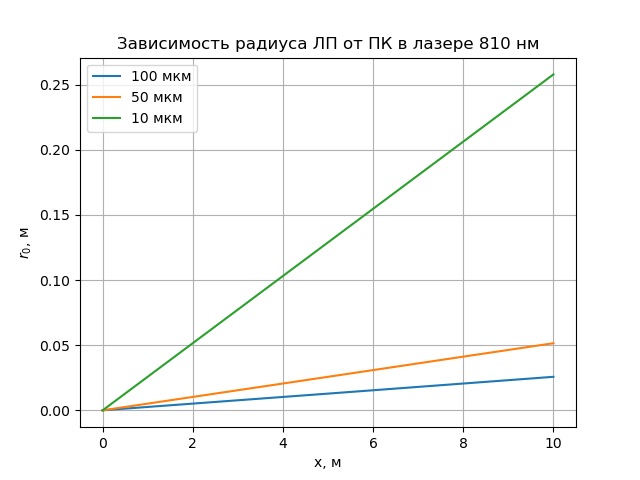

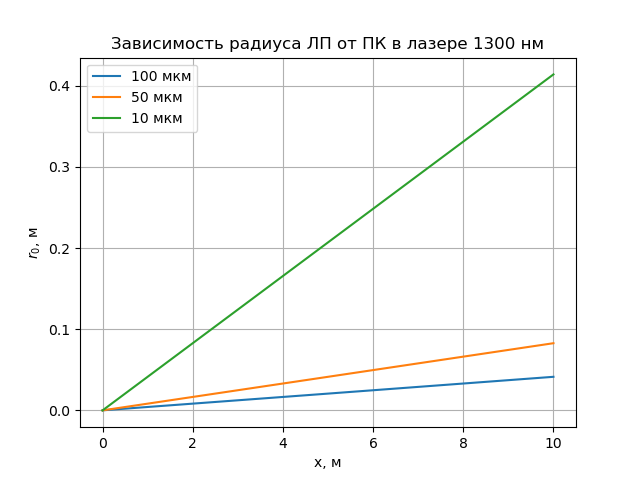

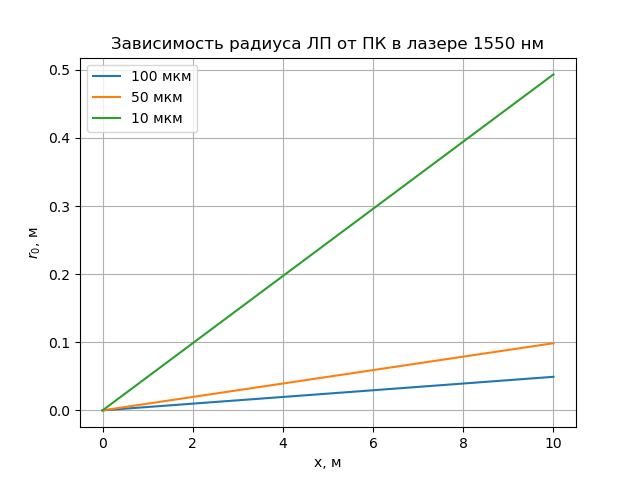

In [7]:
%matplotlib widget
for j in range(len(wavelength)):
    plt.figure(j)
    plt.title('Зависимость радиуса ЛП от ПК в лазере {} нм'.format(round(wavelength[j]*10**9)))
    for z in range(len(r_0)):
        plt.plot(x, r[z][j][:], label='{} мкм'.format(round(r_0[z]*10**6)))
        plt.xlabel('x, м')
        plt.ylabel('$r_0$, м')
        plt.plot
        plt.legend(loc='best')
        plt.grid()
    plt.show()
    plt.savefig('graph4.2.1.'+str(round(wavelength[j]*10**9))+'.png')

Графики, часть 2

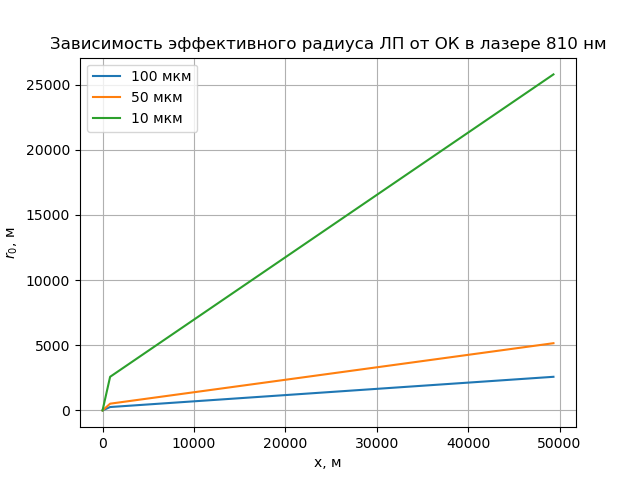

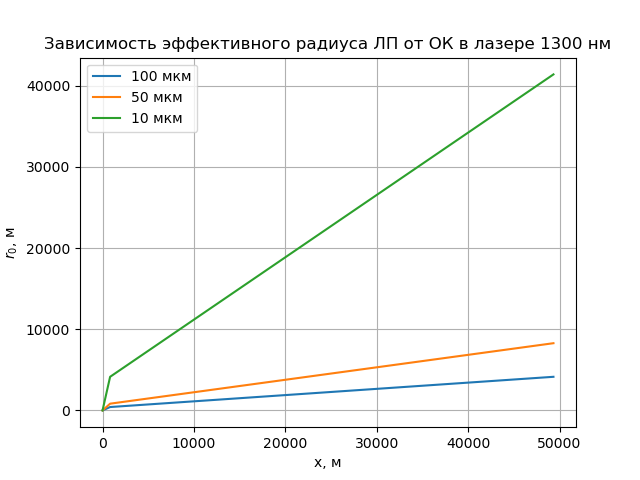

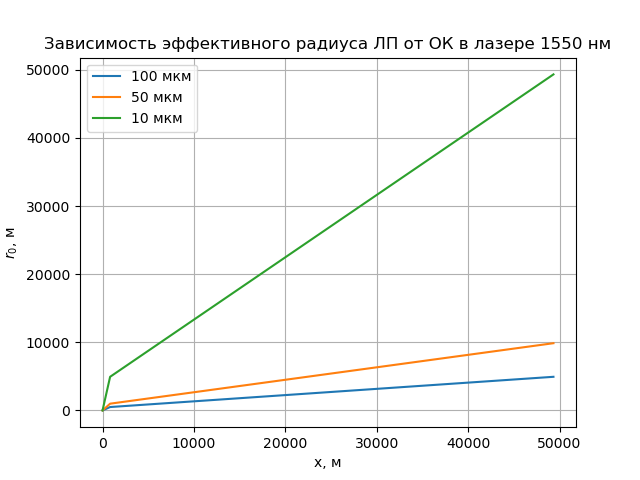

In [8]:
%matplotlib widget
for j in range(len(wavelength)):
    plt.figure(j)
    plt.title('Зависимость эффективного радиуса ЛП от ОК в лазере {} нм'.format(round(wavelength[j]*10**9)))
    for z in range(len(r_0)):
        plt.plot(x/x_r, r[z][j][:]/r_0, label='{} мкм'.format(round(r_0[z]*10**6)))
        plt.xlabel('x, м')
        plt.ylabel('$r_0$, м')
        plt.plot
        plt.legend(loc='best')
        plt.grid()
    plt.show()
    plt.savefig('graph4.2.2.'+str(round(wavelength[j]*10**9))+'.png')

Нелинейность графиков в этой части работы вызывает вопросы. Связана либо с массивом, что я определяю для пространственных координат: в нем три элемента (так как размерности при расчете должны совпадать или выполнение примет совсем тяжкий характер), либо это и есть желаемый результат.